# Project: Analysing the No-show appointments dataset using Pandas and Numpy

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I will be analyzing medical appointments from Brazil focusing my questions on whether or not patients show up for their appointment or not and what could be factors contribution to no show of appointments. 

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load my data, have a look at it and clean, align or adjust the dataset before analyzing

### General Properties

In [1]:
#load pandas and numpy and import dataset

import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [2]:
#lets have a quick look of the dataset and it's variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [3]:
#Checking if there are any missing values

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Data Cleaning 

I have noted that the column names don't have consistency as well as schedule day and appointment date are strings instead of time date. In addition to that the Patient Id type is float instead of integer.

In the below section I will be cleaning and adjusting the columns 

In [4]:
#Renaming the columns for consistency

df.columns = ['Patient_id', 'Appointment_id', 'Gender', 'Scheduled_day', 
              'Appointment_day', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
              'Diabetes', 'Alcoholism', 'Handicap', 'Sms_received', 'No_show']
df.columns

Index(['Patient_id', 'Appointment_id', 'Gender', 'Scheduled_day',
       'Appointment_day', 'Age', 'Neighbourhood', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'Sms_received',
       'No_show'],
      dtype='object')

In [5]:
#Converting scheduled_day and appointment_day columns type to datetime. 
df['Scheduled_day'] = pd.to_datetime(df['Scheduled_day']).dt.date.astype('datetime64[ns]')
df['Appointment_day'] = pd.to_datetime(df['Appointment_day']).dt.date.astype('datetime64[ns]')

#As well as changing the Patient_id data type from float to int
df['Patient_id'] = df['Patient_id'].astype('int64')

#let's have another look
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Patient_id       110527 non-null  int64         
 1   Appointment_id   110527 non-null  int64         
 2   Gender           110527 non-null  object        
 3   Scheduled_day    110527 non-null  datetime64[ns]
 4   Appointment_day  110527 non-null  datetime64[ns]
 5   Age              110527 non-null  int64         
 6   Neighbourhood    110527 non-null  object        
 7   Scholarship      110527 non-null  int64         
 8   Hypertension     110527 non-null  int64         
 9   Diabetes         110527 non-null  int64         
 10  Alcoholism       110527 non-null  int64         
 11  Handicap         110527 non-null  int64         
 12  Sms_received     110527 non-null  int64         
 13  No_show          110527 non-null  object        
dtypes: datetime64[ns](2)

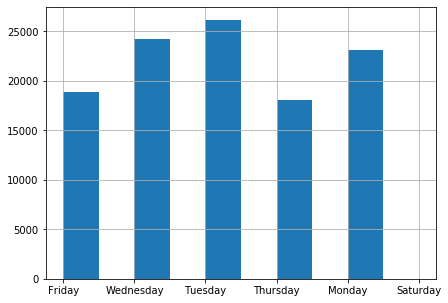

In [6]:
# Create appointment day of week column to see when patients mostly visit
df['adow'] = df.Scheduled_day.dt.day_name()

# Distrubtion of appointments in a week
df['adow'].hist(figsize=(7,5));

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Patient_id       110527 non-null  int64         
 1   Appointment_id   110527 non-null  int64         
 2   Gender           110527 non-null  object        
 3   Scheduled_day    110527 non-null  datetime64[ns]
 4   Appointment_day  110527 non-null  datetime64[ns]
 5   Age              110527 non-null  int64         
 6   Neighbourhood    110527 non-null  object        
 7   Scholarship      110527 non-null  int64         
 8   Hypertension     110527 non-null  int64         
 9   Diabetes         110527 non-null  int64         
 10  Alcoholism       110527 non-null  int64         
 11  Handicap         110527 non-null  int64         
 12  Sms_received     110527 non-null  int64         
 13  No_show          110527 non-null  object        
 14  adow             110

In [8]:
df.describe()

,Patient_id,Appointment_id,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,Sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis


After trimming and cleaning the data I have made the below observations:

**Age:** On averagre the patients are 37 years old with 25% of pantients being 18 and under however most patients are below 55. I can also see an issue where the youngest is -1 and the oldest 115 which I will investigate later

**Handicap:** has 4 classes unlike the the other categories.

**Sms_received:** Apointments sms were recieved by atleast 75% of patients.

And with this information I am going to explore the dataset a bit more before setting my research questions.


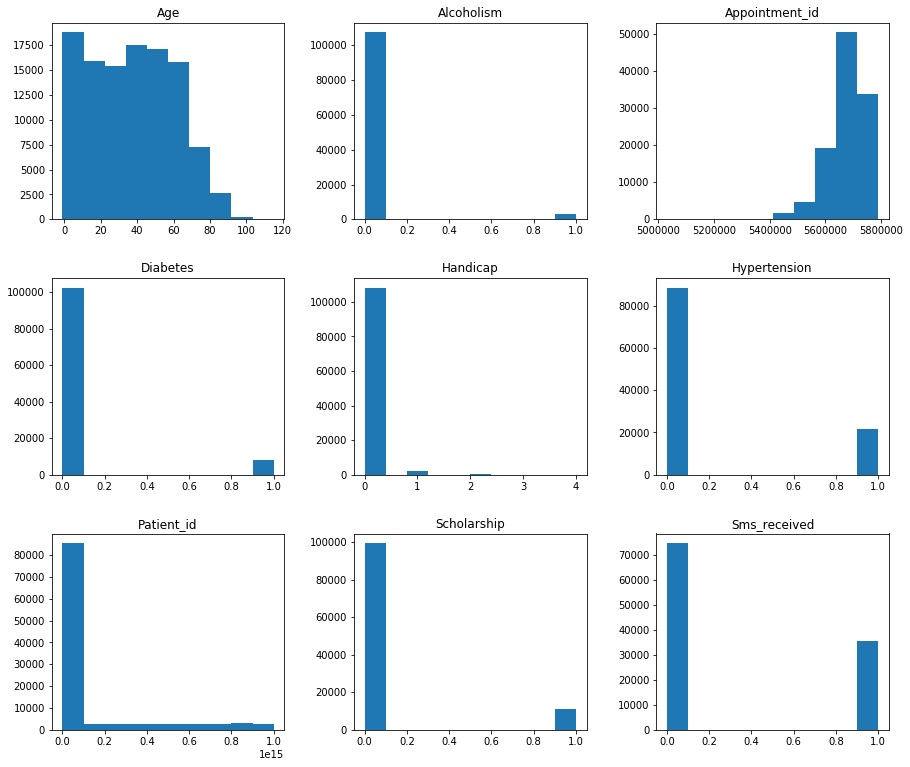

In [9]:
#plotting different distribution of the categories for further observation

df.hist(grid=False, figsize=(15,13));

### Histogram observations:

There is a drastic drop for patients age after the age of 65 and most of the patients aren't handicaps, alcoholics or have either dieabetes or hyperstension diagnosed.

In [10]:
#Further investigating the patients age

age = df['Age'].unique()
age.sort()
print (age)

[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]


### Age observation:

Age values start from -1 to 115. Since there are no such ages as -1 and 0, I will remove those records.

In [11]:
#Age should be greater or = to 1 but not more than 155 since our oldest is 115

df = df[(df.Age >= 1) & (df.Age <= 115)]

In [12]:
#Let's check if the age data is now ok

clean_age = df['Age'].unique()
clean_age.sort()
print (clean_age)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 102 115]


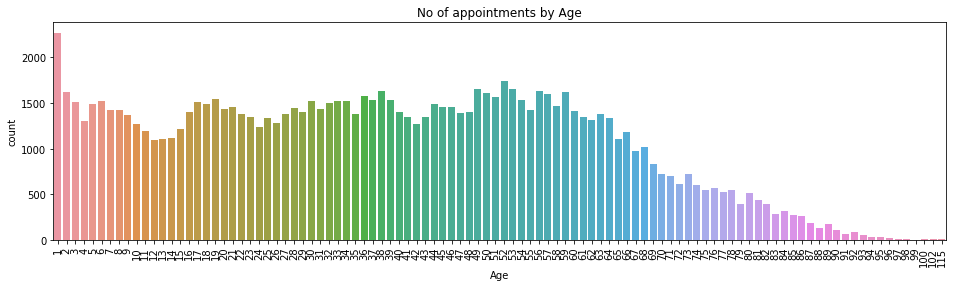

In [13]:
# Checking no patients for each age by appointment

plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age)
ax.set_title("No of appointments by Age")
plt.show()

### Research Question 1: What are the important factors that will predict if a patient will show up for their scheduled appointment or not?

Let's further explore the dataset to find out factors that can help predict if a patient will show up for their scheduled appointments

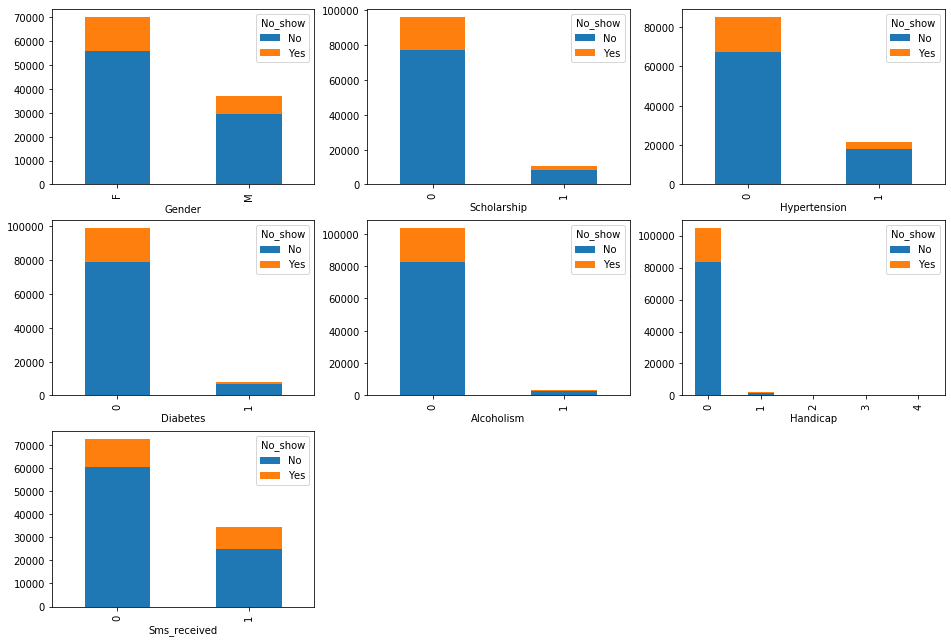

In [14]:
# Let's look at all the categorical variables to see patients who showed up and those who didn't
categorical_vars = ['Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'Sms_received']

fig = plt.figure(figsize=(16, 11))
for i, var in enumerate(categorical_vars):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([var, 'No_show'])[var].count().unstack('No_show').plot(ax=ax, kind='bar', stacked=True)

For most categories it looks almost the same for patients who showed up and those who didn't, using this we can't tell much.
Let's further explore by checking number of days between the day the appointment was scheduled and the day the patient went in

In [15]:
# Create a new column for the waiting time in days between appointment schedule and appointment day
df['Wait_time'] = (df.Appointment_day - df.Scheduled_day).dt.days # and convert timedelta to int

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Patient_id       106987 non-null  int64         
 1   Appointment_id   106987 non-null  int64         
 2   Gender           106987 non-null  object        
 3   Scheduled_day    106987 non-null  datetime64[ns]
 4   Appointment_day  106987 non-null  datetime64[ns]
 5   Age              106987 non-null  int64         
 6   Neighbourhood    106987 non-null  object        
 7   Scholarship      106987 non-null  int64         
 8   Hypertension     106987 non-null  int64         
 9   Diabetes         106987 non-null  int64         
 10  Alcoholism       106987 non-null  int64         
 11  Handicap         106987 non-null  int64         
 12  Sms_received     106987 non-null  int64         
 13  No_show          106987 non-null  object        
 14  adow             106

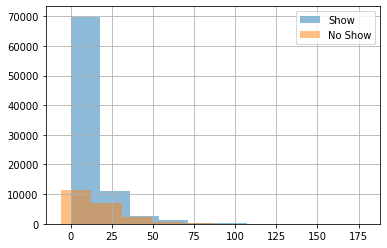

In [18]:
# Number of days between the date of scheduling an appointment and the appointment day
show = df.No_show == 'No'
no_show = df.No_show == 'Yes'


df.Wait_time[show].hist(alpha=0.5, label='Show')
df.Wait_time[no_show].hist(alpha=0.5, label='No Show')
plt.legend();

As we can see the shorter the waiting time the more the patients show up. So most definitely the day between when the patient books the appointment and the day of the appointment matters

#### Let's also check to see if there are patients recurring appointments and who are the top 10 if any?

In [19]:
df.Patient_id.value_counts().iloc[0:10]

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
6264198675331      62
871374938638855    62
258424392677       62
75797461494159     62
66844879846766     57
872278549442       55
Name: Patient_id, dtype: int64

As we can see there are patients with more than 1 appointment ranging from 55 to 88. This can also contribute to the reason for no shows due to too many visits.

### Research Question 2: What is the percentage of patients who missed their appointments?

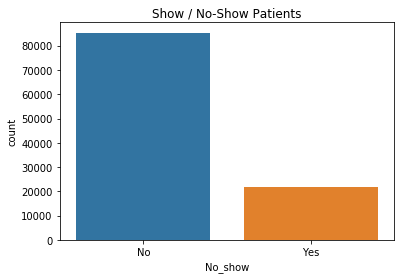

Looks like 20% of appointments were missed.


In [20]:
all_appointments = df.shape[0]
missed_appointments = len(df.query('No_show == \'Yes\''))
missed_ratio = int(round(missed_appointments/all_appointments*100))

ax = sns.countplot(x=df.No_show, data=df)
ax.set_title("Show / No-Show Patients")
plt.show();

print('Looks like {}% of appointments were missed.'.format(missed_ratio))

### Conclusion

After cleaning up the dataset by renaming columns, removing wrong data, adding new columns and features based on existing data as well as investigating the data to make a couple of observations by comparing the variables my findings are as:


1. Distribution of appointments during weekdays is almost the same with little or no visits on Saturday and Sunday.
2. On averagre the patients are 37 years old with 25% of patients being 18 and under however most patients are below - 3. Apointments sms were recieved by atleast 75% of patients.
4. Most of the patients are not alcoholics.
5. There are four handicap categories with most of the people not being handicapted.
6. Most patients do not have hypertension diagnosed.
7. On average, 20% of appointments were missed.
8. There are patients with multiple appointments.
9. The shorter the waiting period the more chances that the patient will show up.
10. Most of the patients are infants.

